# Logistic Regression

#### 작성: 고우주 | 데이터쿱와(주)

## 1. 기본 학습

In [1]:
import pandas as pd
import numpy as np

path = 'data/titanic.csv'
titanic = pd.read_csv(path, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [3]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

- class sklearn.linear_model.LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None)[source]¶

In [4]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1000)
logreg.fit(X_train, y_train)
print(list(zip(feature_cols, logreg.coef_[0])))

[('Pclass', -0.8224727977190704), ('Parch', 0.27168989423664525)]


In [5]:
print(logreg.coef_)
print(logreg.coef_[0])

[[-0.8224728   0.27168989]]
[-0.8224728   0.27168989]


In [6]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

In [7]:
y_pred_class

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [8]:
y_pred_prob = logreg.predict_proba(X_test)

In [9]:
y_pred_prob

array([[0.70867051, 0.29132949],
       [0.76144639, 0.23855361],
       [0.38123256, 0.61876744],
       [0.38123256, 0.61876744],
       [0.76144639, 0.23855361],
       [0.58374177, 0.41625823],
       [0.58374177, 0.41625823],
       [0.58374177, 0.41625823],
       [0.70867051, 0.29132949],
       [0.51845813, 0.48154187],
       [0.64959191, 0.35040809],
       [0.76144639, 0.23855361],
       [0.31951321, 0.68048679],
       [0.76144639, 0.23855361],
       [0.38123256, 0.61876744],
       [0.70867051, 0.29132949],
       [0.38123256, 0.61876744],
       [0.38123256, 0.61876744],
       [0.51845813, 0.48154187],
       [0.58374177, 0.41625823],
       [0.64959191, 0.35040809],
       [0.4488726 , 0.5511274 ],
       [0.58374177, 0.41625823],
       [0.70867051, 0.29132949],
       [0.70867051, 0.29132949],
       [0.76144639, 0.23855361],
       [0.76144639, 0.23855361],
       [0.38123256, 0.61876744],
       [0.76144639, 0.23855361],
       [0.76144639, 0.23855361],
       [0.

In [10]:
# calculate classification accuracy
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred_class))

0.6995515695067265


## 2. Evaluation Model

### Confusion matrix 사용하기

In [11]:
# print confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[114  25]
 [ 42  42]]


In [12]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [13]:
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 42
True Negatives: 114
False Positives: 25
False Negatives: 42


In [14]:
# calculate the sensitivity
print('Sensitivity:', TP / (TP + FN))

Sensitivity: 0.5


In [15]:
# calculate the specificity
print('Specificity:', TN / (TN + FP))

Specificity: 0.8201438848920863


In [16]:
print(metrics.f1_score(y_test, y_pred_class))

0.5562913907284769


In [17]:
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       139
           1       0.63      0.50      0.56        84

    accuracy                           0.70       223
   macro avg       0.68      0.66      0.66       223
weighted avg       0.69      0.70      0.69       223



## 3. Threshold(임계값) 사용?
- y_pred_prob > 0.3 이면 y_pred_class = 1로 임계치 설정

In [18]:
test = logreg.predict_proba(X_test)
print(test)

[[0.70867051 0.29132949]
 [0.76144639 0.23855361]
 [0.38123256 0.61876744]
 [0.38123256 0.61876744]
 [0.76144639 0.23855361]
 [0.58374177 0.41625823]
 [0.58374177 0.41625823]
 [0.58374177 0.41625823]
 [0.70867051 0.29132949]
 [0.51845813 0.48154187]
 [0.64959191 0.35040809]
 [0.76144639 0.23855361]
 [0.31951321 0.68048679]
 [0.76144639 0.23855361]
 [0.38123256 0.61876744]
 [0.70867051 0.29132949]
 [0.38123256 0.61876744]
 [0.38123256 0.61876744]
 [0.51845813 0.48154187]
 [0.58374177 0.41625823]
 [0.64959191 0.35040809]
 [0.4488726  0.5511274 ]
 [0.58374177 0.41625823]
 [0.70867051 0.29132949]
 [0.70867051 0.29132949]
 [0.76144639 0.23855361]
 [0.76144639 0.23855361]
 [0.38123256 0.61876744]
 [0.76144639 0.23855361]
 [0.76144639 0.23855361]
 [0.64959191 0.35040809]
 [0.51660963 0.48339037]
 [0.58374177 0.41625823]
 [0.76144639 0.23855361]
 [0.51660963 0.48339037]
 [0.76144639 0.23855361]
 [0.76144639 0.23855361]
 [0.76144639 0.23855361]
 [0.58374177 0.41625823]
 [0.38123256 0.61876744]


In [19]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

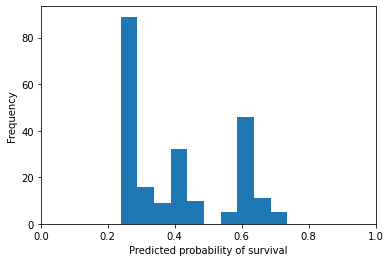

In [20]:
# histogram of predicted probabilities
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [21]:
# increase sensitivity by lowering the threshold for predicting survival
y_pred_class_new = np.where(y_pred_prob >= 0.3, 1, 0) # cut-off value if문과 비슷 조건에 맞으면 1, 아니면 0

In [22]:
y_pred_class_new

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0])

In [23]:
# old confusion matrix
print(confusion)

[[114  25]
 [ 42  42]]


In [24]:
confusion_new = metrics.confusion_matrix(y_test, y_pred_class_new)
print(confusion_new)

[[84 55]
 [21 63]]


In [25]:
TP = confusion_new[1][1]
TN = confusion_new[0][0]
FP = confusion_new[0][1]
FN = confusion_new[1][0]

In [26]:
# new sensitivity (higher than before)
print('Sensitivity:', TP / float(TP + FN))

Sensitivity: 0.75


In [27]:
# new specificity (lower than before)
print('Specificity:', TN / float(TN + FP))

Specificity: 0.60431654676259


In [28]:
print(metrics.classification_report(y_test, y_pred_class_new))

              precision    recall  f1-score   support

           0       0.80      0.60      0.69       139
           1       0.53      0.75      0.62        84

    accuracy                           0.66       223
   macro avg       0.67      0.68      0.66       223
weighted avg       0.70      0.66      0.66       223



In [29]:
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       139
           1       0.63      0.50      0.56        84

    accuracy                           0.70       223
   macro avg       0.68      0.66      0.66       223
weighted avg       0.69      0.70      0.69       223



- 바꿔준다고해서 정확도가 높아지는 것은 아니라는 것을 알 수 있다

## 4. ROC, AUC

### ROC curve 그리기, AUC 계산하기

- sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)[source]¶

In [30]:
from sklearn.metrics import roc_curve, auc

In [31]:
classifier = LogisticRegression(penalty='l2', C=1)
y_prob = classifier.fit(X_train, y_train).predict_proba(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [32]:
print(y_prob[0:5,:])

[[0.70778909 0.29221091]
 [0.76002498 0.23997502]
 [0.3834272  0.6165728 ]
 [0.3834272  0.6165728 ]
 [0.76002498 0.23997502]]


In [33]:
print(y_score[0:5])

[-0.88467033 -1.15281645  0.47502661  0.47502661 -1.15281645]


In [34]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
# fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7245632065775951


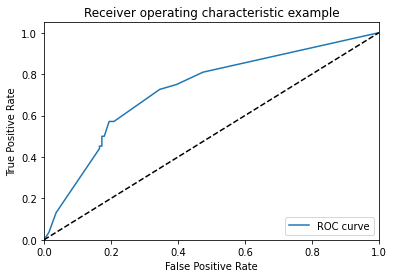

In [35]:
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 5. GridSearchCV with LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import GridSearchCV

import warnings 
warnings.filterwarnings("ignore")

In [37]:
param_grid = {
    'C':[0.01, 0.1, 1, 10, 100],
    'penalty':['l1', 'l2']
}

In [38]:
LR = LogisticRegression()
GV = GridSearchCV(LR, param_grid, scoring='accuracy', cv=10)

In [39]:
GV = GV.fit(X_train, y_train)
y_pred_gv = GV.predict(X_test)

In [40]:
GV.best_params_

{'C': 1, 'penalty': 'l2'}

In [41]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred_gv))

0.6995515695067265


In [42]:
print(metrics.classification_report(y_test, y_pred_gv))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       139
           1       0.63      0.50      0.56        84

    accuracy                           0.70       223
   macro avg       0.68      0.66      0.66       223
weighted avg       0.69      0.70      0.69       223



## 6. Pipeline with Logistic Regression

In [43]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression

In [50]:
# 최소값을 0, 최대값을 1로 변환하여 scale
scale = preprocessing.MinMaxScaler(feature_range = [0,1])

# 모델 fit
LR = LogisticRegression()

# 파이프라인 구성
pipeline = Pipeline([('scaler', scale), ('model', LR)])

# Hyper-Parmeters 튜닝
param_grid = {
    'model__C':[0.01, 0.1, 1, 10, 100],
    'model__penalty':['l1', 'l2'] # pipline을 쓰기 위해서는 model의 키값을 불러오기 위해 model__을 사용해 불러온다 _ --> 에러발생
}

#  AUC 기준 최적 Params 도출 / 10개의 k-fold 설정
GV = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=10)

# Model fit
GV = GV.fit(X_train, y_train)  

print(GV.best_score_)

0.6855269109000452


In [45]:
y_pred_pipe = GV.predict(X_test)

In [46]:
print(metrics.accuracy_score(y_test, y_pred_pipe))

0.6995515695067265


In [47]:
print(metrics.classification_report(y_test, y_pred_pipe))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       139
           1       0.63      0.50      0.56        84

    accuracy                           0.70       223
   macro avg       0.68      0.66      0.66       223
weighted avg       0.69      0.70      0.69       223

